In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
%matplotlib inline

In [7]:
df = pd.read_csv('deliveries.csv')

In [8]:
balls = df.groupby('batsman').batsman.count()
runs = df.groupby('batsman').total_runs.sum()
matches = df.groupby(['batsman']).match_id.nunique()

In [9]:
def update(temp_df):
    temp_df['balls_faced'] = balls[temp_df['batsman']]
    temp_df['matches'] = matches[temp_df['batsman']]
    temp_df['total_run'] = runs[temp_df['batsman']]
    return temp_df

In [10]:
df = df.apply(update,axis='columns')

In [11]:
df = df[['batsman','balls_faced','matches','total_run']]

In [12]:
df = df.drop_duplicates()

In [13]:
df['strike_rate'] = df['total_run'] * 100 / df['balls_faced']

In [33]:
df['avg'] = df['total_run'] / df['matches']

In [40]:
df = df.sort_values(by = 'total_run',ascending = False)

In [42]:
df.reset_index()

,index,batsman,balls_faced,matches,total_run,strike_rate,avg
0,270,SK Raina,3059,143,4291,140.274600,30.006993
1,132,V Kohli,3237,131,4274,132.035836,32.625954
2,991,RG Sharma,2996,137,3985,133.010681,29.087591
3,595,G Gambhir,3028,130,3857,127.377807,29.669231
4,14064,CH Gayle,2360,91,3697,156.652542,40.626374
...,...,...,...,...,...,...,...
431,52564,L Ablish,2,1,0,0.000000,0.000000
432,23666,C Nanda,1,1,0,0.000000,0.000000
433,9677,Abdur Razzak,2,1,0,0.000000,0.000000
434,7504,U Kaul,1,1,0,0.000000,0.000000


In [48]:
df = df.reset_index()

In [50]:
df = df.drop(columns = 'index')

In [52]:
top_10_scorer = df.loc[:10,'batsman']
top_10 = df.loc[:10,'total_run']

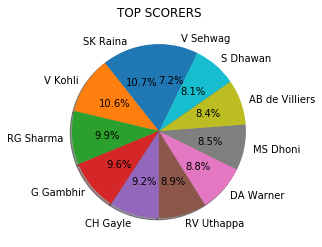

In [55]:
fig,axes = plt.subplots()
plt.title('TOP SCORERS')
axes.pie(top_10, labels=top_10_scorer, autopct='%1.1f%%',shadow=True, startangle=90);

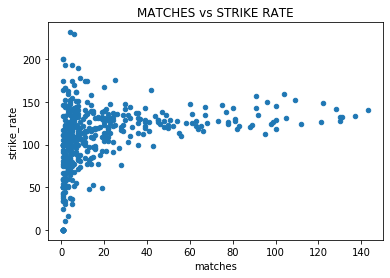

In [60]:
df.plot(x='matches',y = 'strike_rate',kind = 'scatter',title = 'MATCHES vs STRIKE RATE')

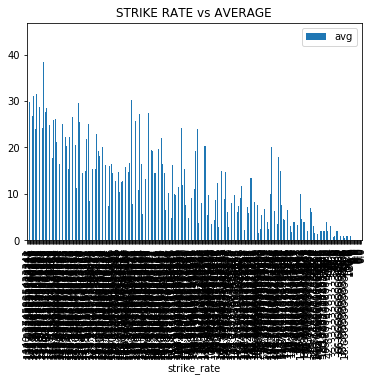

In [63]:
df.plot(x = 'strike_rate',y = 'avg',kind = 'bar',title = 'STRIKE RATE vs AVERAGE')